# Pre-trained network

Entrenar modelos tan grandes resulta costoso y podemos beneficiarnos de la estructura de los modelos existente de forma que solo ajustemos los parámetros finales de cara a la tarea en cuestión que queramos resolver.

![imagen](https://www.researchgate.net/publication/336874848/figure/fig1/AS:819325225144320@1572353764073/Illustrations-of-transfer-learning-a-neural-network-is-pretrained-on-ImageNet-and.png)

Estas son las arquitecturas de redes neuronales más utilizadas en la comunidad. Para más detalle sobre el funcionamiento de cada red, consultar el [Hands on Machine Learning for Python](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch14.html#cnn_chapter).
* VGG-16
* VGG-19
* Inception V3
* XCeption
* ResNet-50

Las redes se pueden incorporar entrenadas, o sin entrenar.

## ResNet50V2

In [1]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(include_top= True, input_shape=(224, 224, 3), weights='imagenet', classifier_activation= 'softmax')

2024-07-16 15:46:05.337250: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 15:46:05.345351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 15:46:05.354085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 15:46:05.356660: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 15:46:05.363627: I tensorflow/core/platform/cpu_feature_guar

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [2]:
len(base_model.layers)

192

In [3]:
base_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

Cargamos algunas imagenes desde local, para ver qué tal funciona la red ResNet50V2 ya entrenada.

In [4]:
import os

def read_data(path):
    X = []
    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224,224))
        print(path + '/' + file)

        X.append(smallimage)
    return np.array(X)


In [9]:
import cv2
import numpy as np
from skimage.io import imread
from tensorflow.keras.applications.resnet_v2 import preprocess_input

X_test = read_data('img')

#Preprocesar las imagenes tal y como entran en el model
X_test = preprocess_input(X_test)
print(X_test.shape)

img/cat.8037.jpg
img/dog.11857.jpg
img/karate.jpg
img/horse.jpg
img/bear-1.jpg
img/pizza.jpg
img/dog.11856.jpg
img/cat.8016.jpg
(8, 224, 224, 3)


In [10]:
preds = base_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


In [11]:
len(preds)

8

In [12]:
preds

array([[8.51678408e-08, 1.48219954e-07, 2.96174818e-08, ...,
        6.29417798e-08, 3.85343441e-07, 2.36543428e-06],
       [2.21357342e-11, 5.28723332e-12, 1.83441682e-11, ...,
        6.36445931e-12, 2.48052204e-11, 4.15321354e-11],
       [1.00017566e-07, 7.63494754e-05, 2.60811048e-05, ...,
        2.81112693e-06, 5.11689677e-06, 9.27556266e-06],
       ...,
       [4.66892232e-08, 3.35647599e-07, 8.29795539e-08, ...,
        4.40287067e-07, 4.27222972e-07, 1.87026110e-08],
       [7.86679891e-07, 1.24026553e-06, 5.81834286e-07, ...,
        1.56849083e-07, 9.36250785e-07, 5.84533382e-07],
       [1.97706977e-05, 5.40830115e-05, 1.66412156e-05, ...,
        1.18371772e-05, 1.11987589e-04, 2.58014217e-04]], dtype=float32)

In [13]:
len(preds[0])

1000

In [15]:
from tensorflow.keras.applications.resnet_v2 import decode_predictions

decodes = decode_predictions(preds, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [16]:
decodes

[[('n02124075', 'Egyptian_cat', 0.8209841),
  ('n02127052', 'lynx', 0.1267946),
  ('n02123597', 'Siamese_cat', 0.021530582)],
 [('n02106030', 'collie', 0.99525696),
  ('n02105855', 'Shetland_sheepdog', 0.004742984),
  ('n12057211', "yellow_lady's_slipper", 9.142557e-09)],
 [('n09835506', 'ballplayer', 0.5402343),
  ('n02799071', 'baseball', 0.2465794),
  ('n02777292', 'balance_beam', 0.1172521)],
 [('n02113799', 'standard_poodle', 0.3245569),
  ('n02091831', 'Saluki', 0.30035418),
  ('n02412080', 'ram', 0.1232791)],
 [('n02132136', 'brown_bear', 0.9994437),
  ('n02112137', 'chow', 0.0005415538),
  ('n02133161', 'American_black_bear', 8.780951e-06)],
 [('n07873807', 'pizza', 0.99713033),
  ('n07693725', 'bagel', 0.0011670353),
  ('n07875152', 'potpie', 0.001040389)],
 [('n02106550', 'Rottweiler', 0.7329099),
  ('n02112706', 'Brabancon_griffon', 0.085084856),
  ('n02093256', 'Staffordshire_bullterrier', 0.031059252)],
 [('n02124075', 'Egyptian_cat', 0.64985144),
  ('n02123597', 'Siamese_

In [17]:
for j in decodes:
    print('####################')
    for i,decode in enumerate(j):
        print("Predicted:\n", decode[1], decode[2])

####################
Predicted:
 Egyptian_cat 0.8209841
Predicted:
 lynx 0.1267946
Predicted:
 Siamese_cat 0.021530582
####################
Predicted:
 collie 0.99525696
Predicted:
 Shetland_sheepdog 0.004742984
Predicted:
 yellow_lady's_slipper 9.142557e-09
####################
Predicted:
 ballplayer 0.5402343
Predicted:
 baseball 0.2465794
Predicted:
 balance_beam 0.1172521
####################
Predicted:
 standard_poodle 0.3245569
Predicted:
 Saluki 0.30035418
Predicted:
 ram 0.1232791
####################
Predicted:
 brown_bear 0.9994437
Predicted:
 chow 0.0005415538
Predicted:
 American_black_bear 8.780951e-06
####################
Predicted:
 pizza 0.99713033
Predicted:
 bagel 0.0011670353
Predicted:
 potpie 0.001040389
####################
Predicted:
 Rottweiler 0.7329099
Predicted:
 Brabancon_griffon 0.085084856
Predicted:
 Staffordshire_bullterrier 0.031059252
####################
Predicted:
 Egyptian_cat 0.64985144
Predicted:
 Siamese_cat 0.1678721
Predicted:
 tiger_cat 0.0604

## VGG16
En este caso vamos a importar la red VGG16, que utilizaremos como red preentrenada y completaremos con una fully connected layer. 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

IM_SIZE=32

TRAIN_PATH = "../Redes Convolucionales/data/dogsandcats/train"
filenames = os.listdir(TRAIN_PATH)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
    
df = pd.DataFrame({
    'filenames': filenames,
    'category': categories
})

train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [21]:
train_df.head()

filenames category
0  dog.11527.jpg      dog
1  dog.11720.jpg      dog
2   cat.1046.jpg      cat
3   cat.2644.jpg      cat
4   cat.3735.jpg      cat

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [24]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='filenames',
                                                    y_col='category',
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (IM_SIZE, IM_SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TRAIN_PATH,
                                                              x_col='filenames',
                                                              y_col='category',
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (IM_SIZE, IM_SIZE))

Found 5260 validated image filenames belonging to 2 classes.
Found 1316 validated image filenames belonging to 2 classes.


In [25]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(IM_SIZE,IM_SIZE,3),
                    include_top=False,
                    weights = 'imagenet'
                )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [26]:
len(base_model.layers)

19

In [27]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
    
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [31]:
len(model.layers)

23

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 14,977,857 (57.14 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
vgghist = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 128,
                    epochs = 5)

Epoch 1/5


/home/iraitz/TheBridge/Otros/TheBridge_DSPT_ML/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - acc: 0.6069 - loss: 0.7248 - val_acc: 0.6011 - val_loss: 0.6819
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - acc: 0.6163 - loss: 0.6709 - val_acc: 0.6011 - val_loss: 0.6729
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 133ms/step - acc: 0.6069 - loss: 0.6708 - val_acc: 0.6011 - val_loss: 0.6735
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 132ms/step - acc: 0.6189 - loss: 0.6653 - val_acc: 0.6011 - val_loss: 0.6727
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 132ms/step - acc: 0.6172 - loss: 0.6655 - val_acc: 0.6011 - val_loss: 0.6726


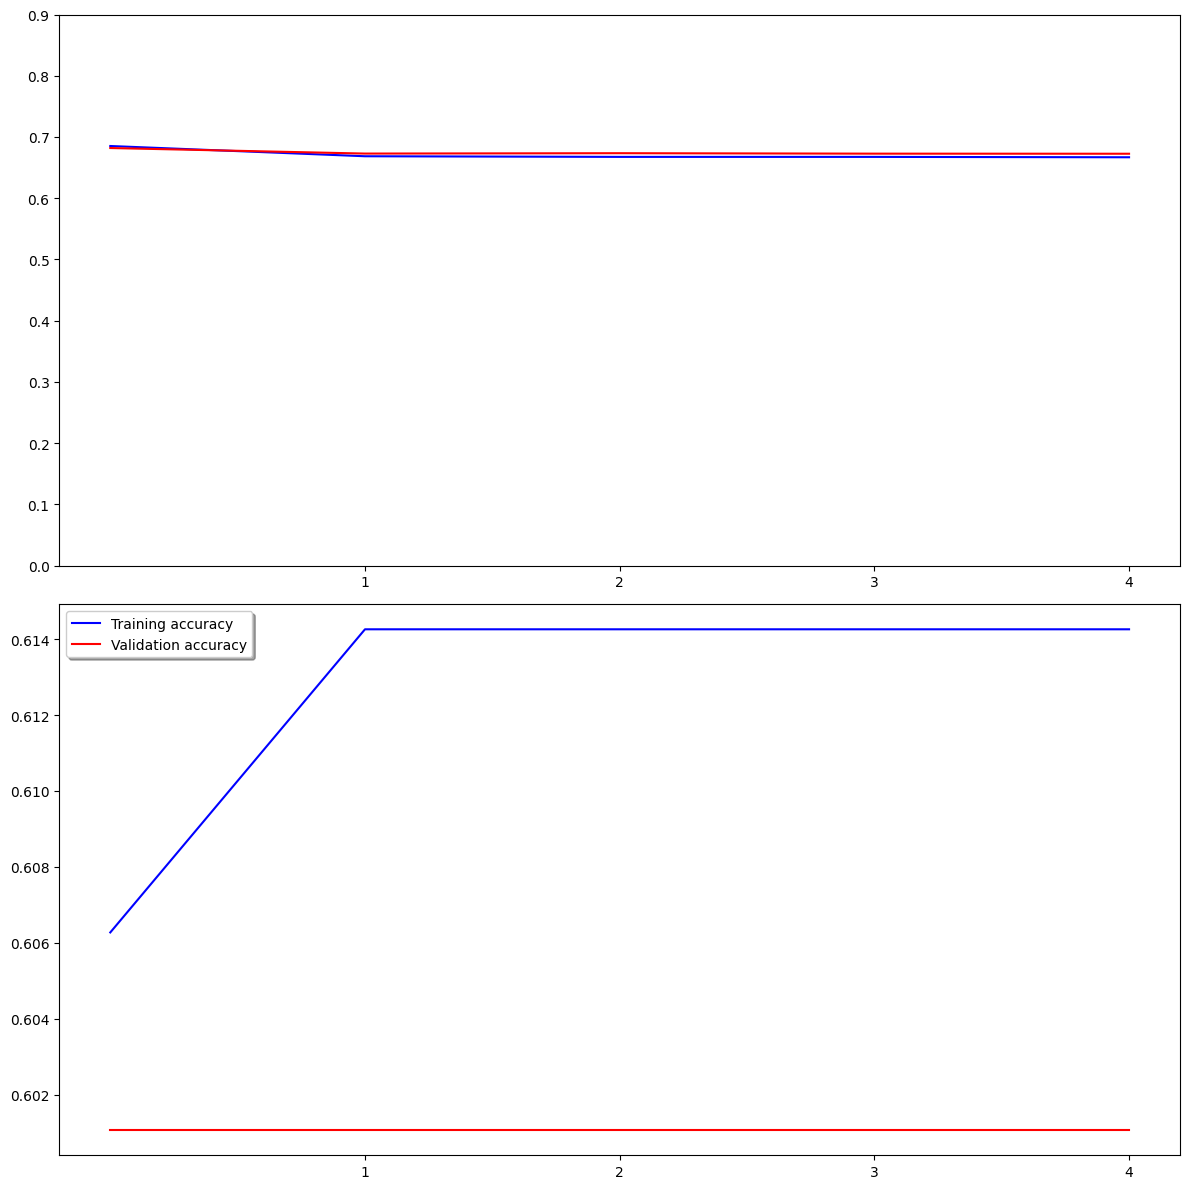

In [45]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(vgghist.history['loss'], color='b', label="Training loss")
ax1.plot(vgghist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(vgghist.history['acc'], color='b', label="Training accuracy")
ax2.plot(vgghist.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))

plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Hubs de modelos

Basados en este principio han prolifero los sitios donde la gente cuelga sus modelos, siendo uno de los más habituales HuggingFace: https://huggingface.co/models

Tomemos como ejemplo la ResNet50: https://huggingface.co/microsoft/resnet-50
